# America's 500 Largest Cities through the Numbers
### An exploration of urban health compiled by Kennon Stewart
We live in strange times. The COVID-19 pandemic exposed the holes in many states' health systems and, for the first time, states are reckoning with their inadequate public health measures. This is an exploration of the pre-COVID health issues facing individual census tracts in 2016-2017, brought together to paint a larger picture of their state.

In [1]:
%autosave 15
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd

Autosaving every 15 seconds


The dataset I'm using is the 500 Cities database provided by the CDC in 2019. Unfortunately the set only has data from years 2016 and 2017 so, if anyone knows of more comprehensive data, let me know! As for this dataset, I want to save as much stress on my laptop as possible so I'll only read the relevant columns.

In [2]:
cols = ['Year','StateAbbr','High_Confidence_Limit','UniqueID','Short_Question_Text']

# Variables:
# StateAbbr = State Abbreviation
# High_Confidence_Limit = the highest confidence limit estimate for a particular census tract for a particular ailment
# Unique_ID = the unique ID for each census tract in the country which will be matched with census data from the year 2017
# Short_Question_Text = 

cities = pd.read_csv('/Users/student/Downloads/500 Cities/500_Cities__Local_Data_for_Better_Health__2019_release.csv', usecols=cols)

I'm also uploading racial data from the Census that gives demographic information for the tracts we're analyzing in the cities dataset. This gives us more information about the backgroud of each tract and allows us to take a larger look at the relationships between health and social factors.

In [3]:
cols2 = ['GEO_ID','DP05_0038E','DP05_0038M','DP05_0038PE','DP05_0038PM']

# Variables:
# GEO_ID = ID of the Census tract 
# DP05_0038E = estimated real count of Black Americans
# DP05_0038M = margin of error of real count of Black Americans
# DP05_0038PE = estimated percentage of Black Americans
# DP05_0038PM = margin of error of estimated percentage of Black Americans

racial = pd.read_csv('/Users/student/Downloads/ACSDP5Y2017.DP05_2020-06-27T105923/ACSDP5Y2017.DP05_data_with_overlays_2020-06-27T105738.csv',usecols=cols2,low_memory=False)

I'll go ahead and clean the Unique ID's for the census tracts. This helps us join the tables together 

In [4]:
cities['ID'] = cities['UniqueID'].map(lambda x: x.replace('-',''))
cities['ID'] = cities['UniqueID'].map(lambda x: x[8:])
cities = cities.drop('UniqueID',axis=1)

In [5]:
cities.head(10)

,Year,StateAbbr,High_Confidence_Limit,Short_Question_Text,ID
0,2016,IL,39.9,Teeth Loss,17031612000
1,2016,IL,46.3,Dental Visit,17031660700
2,2017,IL,10.5,Current Asthma,17115001100
3,2016,IL,27.4,Teeth Loss,17197881603
4,2017,IL,26.3,High Cholesterol,17031804405
5,2016,IL,28.3,Teeth Loss,17197882801
6,2016,IL,37.4,Sleep <7 hours,17031840400
7,2017,IL,10.3,Diabetes,17031151002
8,2017,IL,41.1,Obesity,17031381900
9,2016,IL,14.1,Teeth Loss,17031130300


In [6]:
racial = racial.drop([0])
racial['ID'] = racial['GEO_ID'].map(lambda x: x.replace('US',''))
mess = ['*','**','-']
for i in mess:
    racial['DP05_0038PM'] = racial['DP05_0038PM'].map(lambda x: x.replace(i,'NaN'))
    racial['DP05_0038PE'] = racial['DP05_0038PE'].map(lambda y: y.replace(i,'NaN'))
racial['ID'] = racial['GEO_ID'].map(lambda x: x[9:])
racial = racial.drop('GEO_ID',axis=1)

In [7]:
racial.head()

,DP05_0038E,DP05_0038M,DP05_0038PE,DP05_0038PM,ID
1,163,161,6.2,5.9,01007010001
2,303,199,4.9,3.1,01007010002
3,890,412,17.7,7.3,01007010003
4,3623,438,41.6,4.2,01007010004
5,980,151,87.5,6.6,01087231603


We were successfully able to merge the racial and health data of most census tracts within the United States, consisting of the 500 largest cities within the country. Because of the outer merge, we can also see that some of the census data we loaded doesn't have any corresponding CDC data. Since the analysis is only of the 500 largest cities, we'll exclude these from analysis. In addition, some of the survey tracts within the 500 Cities survey were too small to be surveyed effectively, so researchers didn't report those counties.

In [8]:
combined = pd.merge(racial, cities, on='ID', how='inner')
combined.dropna(inplace=True)

In [9]:
combined.shape

(746577, 9)

In [10]:
michigan = combined[combined['StateAbbr']=='MI']

For a sample analysis, I'll look at my home state of Michigan. Now that I have the percentage of Black residents in each census tract as well as the prevalence of health outcomes in that tract, I can run a one-way ANOVA. This is a standard test to determine whether an independent variable impacts some numeric dependent variable, in this instance we'll do Coronary Heart Disease.

In [11]:
chdMI = michigan[michigan['Short_Question_Text']=='Coronary Heart Disease']

In [12]:
chdMI.head(15)

,DP05_0038E,DP05_0038M,DP05_0038PE,DP05_0038PM,ID,Year,StateAbbr,High_Confidence_Limit,Short_Question_Text
378930,236,207,3.7,3.2,26099230602,2017,MI,8.0,Coronary Heart Disease
378977,197,114,2.8,1.6,26099230601,2017,MI,7.0,Coronary Heart Disease
378996,942,275,26.8,6.0,26099268400,2017,MI,10.5,Coronary Heart Disease
379102,353,116,4.7,1.6,26161400300,2017,MI,1.8,Coronary Heart Disease
379123,88,82,2.0,1.8,26161400600,2017,MI,3.4,Coronary Heart Disease
379155,439,170,21.2,7.3,26161404200,2017,MI,4.3,Coronary Heart Disease
379184,4180,472,96.0,2.7,26163541500,2017,MI,10.6,Coronary Heart Disease
379217,2092,290,93.9,3.1,26163541700,2017,MI,10.5,Coronary Heart Disease
379236,3017,427,95.1,5.5,26163543200,2017,MI,7.9,Coronary Heart Disease
379275,1479,371,96.0,2.6,26163545300,2017,MI,10.6,Coronary Heart Disease


In [13]:
chdMI[['DP05_0038E','DP05_0038M']] = chdMI[['DP05_0038E','DP05_0038M']].astype(int)
chdMI[['DP05_0038PE','DP05_0038PM']] = chdMI[['DP05_0038PE','DP05_0038PM']].astype('float64')
chdMI['DP05_0038PE'].describe()

/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:2963: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


count    724.000000
mean      44.781906
std       38.695059
min        0.000000
25%        7.900000
50%       27.800000
75%       89.875000
max      100.000000
Name: DP05_0038PE, dtype: float64

In [26]:

for i in range(25,101,25):
    chdMI.loc[chdMI['DP05_0038PE'] <= np.percentile(chdMI['DP05_0038PE'],i), 'DL'] = dl

4.0
2.0
1.3333333333333333
1.0


/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [25]:
chdMI.head()

,DP05_0038E,DP05_0038M,DP05_0038PE,DP05_0038PM,ID,Year,StateAbbr,High_Confidence_Limit,Short_Question_Text,DL
378930,236,207,3.7,3.2,26099230602,2017,MI,8.0,Coronary Heart Disease,1.0
378977,197,114,2.8,1.6,26099230601,2017,MI,7.0,Coronary Heart Disease,1.0
378996,942,275,26.8,6.0,26099268400,2017,MI,10.5,Coronary Heart Disease,1.0
379102,353,116,4.7,1.6,26161400300,2017,MI,1.8,Coronary Heart Disease,1.0
379123,88,82,2.0,1.8,26161400600,2017,MI,3.4,Coronary Heart Disease,1.0


In [ ]:
chdMI.loc[chdMI['DP05_0038PE'] <= 100, 'DL']= 4
chdMI.loc[chdMI['DP05_0038PE'] <= 89.875, 'DL']= 3
chdMI.loc[chdMI['DP05_0038PE'] <= 27.8, 'DL']= 2
chdMI.loc[chdMI['DP05_0038PE'] <= 7.9, 'DL']= 1

In [15]:
chdMI['DL'] = chdMI['DL'].astype('int')

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [16]:
chdMI.head()

,DP05_0038E,DP05_0038M,DP05_0038PE,DP05_0038PM,ID,Year,StateAbbr,High_Confidence_Limit,Short_Question_Text,DL
378930,236,207,3.7,3.2,26099230602,2017,MI,8.0,Coronary Heart Disease,1
378977,197,114,2.8,1.6,26099230601,2017,MI,7.0,Coronary Heart Disease,1
378996,942,275,26.8,6.0,26099268400,2017,MI,10.5,Coronary Heart Disease,2
379102,353,116,4.7,1.6,26161400300,2017,MI,1.8,Coronary Heart Disease,1
379123,88,82,2.0,1.8,26161400600,2017,MI,3.4,Coronary Heart Disease,1


## One-Way ANOVA + Linear Regression
### A Note on Categorical Variables
I created categorical variable for every census tract based on their percentage Black population in relation to the rest of their state. Categories are 1, 2, 3, and 4 with 1 being a tract in the lower 25% of Michigan tracts for % of Black residents and 4 being the highest 25% of Michigan tracts for Black residents. This allows us to rank categorical variables and continue with statistical tests that require them.

In addition, I also want to train a linear model that can predict the prevalence of CHD depending on a tract's Black population. In order to do that, I examine the distribution of our Black %'s ranging from 0-100.

In [17]:
import scipy.stats as stats

### Assumptions
Since the one-way ANOVA requires that the distributions of the levels of the independent variables, our Diversity Levels, we can check and see whether the histograms are a normal distribution. Another option would be to run a formal test such as the Shapiro-Wilke test, but I'm going to eyeball the distributions due to our decently large sample size. I determined them to all be normal distribution.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fd29355f0d0>,
      dtype=object)

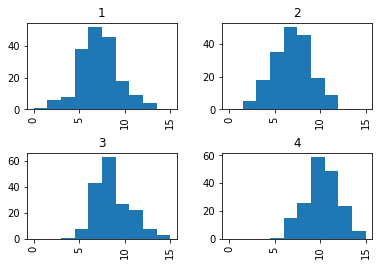

In [18]:
chdMI['High_Confidence_Limit'].hist(chdMI['DL'],range=[0,15])

### Data Distribution
Notice that the distribution below of the % Black residents in a tract is bimodal. This raises issues for performing a linear regression because the samples in my training set are most likely to come from the far right (DL = 1) or far left (DL = 4) of the distribution, which doesn't expose the model to tracts with lessened degrees of segregation (DL = 2,3).

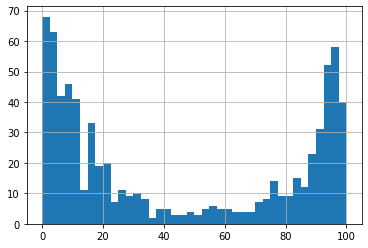

In [19]:
chdMI['DP05_0038PE'].hist(bins=40)

In [20]:
print(chdMI['Short_Question_Text'].unique)

<bound method Series.unique of 378930    Coronary Heart Disease
378977    Coronary Heart Disease
378996    Coronary Heart Disease
379102    Coronary Heart Disease
379123    Coronary Heart Disease
                   ...          
399564    Coronary Heart Disease
399606    Coronary Heart Disease
399628    Coronary Heart Disease
399648    Coronary Heart Disease
399681    Coronary Heart Disease
Name: Short_Question_Text, Length: 724, dtype: object>


After conducting a one-way ANOVA, we can see the result is a miniscule p-value. This means that the percentage of Black people in a given census tract has an impact on the rates of Coronary Heart Disease in Michigan. This is something we can explore more with histograms of the distributions.

We notice that the distributions become progressiv

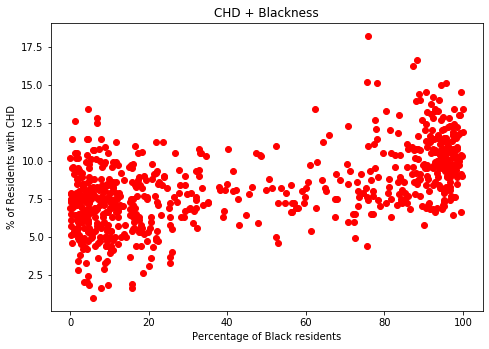

In [21]:
fig=plt.figure()
ax=fig.add_axes([0,0,1,1])
ax.scatter(chdMI['DP05_0038PE'],chdMI['High_Confidence_Limit'], color='r')
ax.set_xlabel('Percentage of Black residents')
ax.set_ylabel('% of Residents with CHD')
ax.set_title('CHD + Blackness')
plt.show()

There's a couple of things to note from the preceding graph. For one, most census tracts in Michigan either have a high percentage of Black residents (>80%) or a very small percentage (<20%). This demonstrates a high degree of segregation between Black and non-Black residents of Michigan. Additionally, there appears to be a positive relationship between the percentage of Black residents and % of Residents afflicted with Coronary Heart Disease, but we won't know until we run a regression.

Coefficients: 
 [[ 4.42421568e-02 -2.57981695e-01]
 [-1.57295258e-17  1.00000000e+00]]
Mean squared error: 2.22
Coefficient of determination: 0.62


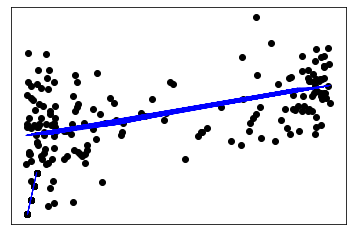

In [22]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score


chd_x = chdMI[['DP05_0038PE','DL']][:]
chd_y = chdMI[['High_Confidence_Limit','DL']][:]
x_train, x_test, y_train, y_test = train_test_split(chd_x,chd_y,stratify=chd_x['DL'],test_size=0.25)
lin_model = LinearRegression()
lin_model.fit(x_train,y_train)

y_predict = lin_model.predict(x_test)
print('Coefficients: \n', lin_model.coef_)

# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(y_test, y_predict))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(y_test, y_predict))

# Plot outputs
plt.scatter(x_test, y_test,  color='black')
plt.plot(x_test, y_predict, color='blue', linewidth=1)

plt.xticks(())
plt.yticks(())

plt.show()

In the linear regression, I'd like to stress the importance of the stratify parameter in the selection of the training and test sets. By ensuring that there was an equal proportion of each Diversity Level, our model was able to train on census tracts of each DL so that the model takes into account the CHD rates of tracts with higher percentages of Black residents.

In [23]:
stats.f_oneway(chdMI ['High_Confidence_Limit'][chdMI['DP05_0038PE'] == 1],
               chdMI['High_Confidence_Limit'][chdMI['DP05_0038PE'] == 2],
               chdMI['High_Confidence_Limit'][chdMI['DP05_0038PE'] == 3],
               chdMI['High_Confidence_Limit'][chdMI['DP05_0038PE'] == 4],)

F_onewayResult(statistic=0.6359111390548047, pvalue=0.6187354495754346)

Since we got a p-value greater than 0.05, we accept the null hypothesis that the percentage of Black residents doesn't have an impact on coronary heart disease. We can instead continue with our analysis and consider alternative factors such as the percentage of people of color (POC) as opposed to just Black residents, and consider other ailments such as Asthma and High Blood Pressure. It's also worth noting that, since the data is composed of only large cities, it excludes health data from rural and suburban cities in Michigan, which may have an alternate racial demographic.

In [24]:
chdMI[['DP05_0038PE','DL']].head()

,DP05_0038PE,DL
378930,3.7,1
378977,2.8,1
378996,26.8,2
379102,4.7,1
379123,2.0,1
